# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

# Phathu


In [63]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plot
import math

In [4]:
# Reading in the Nobel Prize data
nobel = pd.read_csv("datasets/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Task 1
#### I imported the necessary libraries as requested:</p>
- NumPy = Numerical Python, is a library consisting of multidimensional array(list) objects and a collection of routines for processing those arrays.
- Matplotlib offers a hierarchy of objects abstracting various elements of a plot. Enabling us to be ble to draw and plot different types of graphs. The hierarchy starts with the top-level Figure object that may contain a series of intermediate level objects and Axes – from Scatter, to Line and Marker.
- Pandas is a library that offers data structures and operations for manipulating numerical tables and time series.
- Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.</p>
- Math library provides access to the mathematical functions defined by the C standard.
#### Secondly, I read into the csv dataset from the given folder.

In [45]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 21 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
usa_born_winner         911 non-null bool
decades                 911 non-null int32
female_winner       

#### I then just decided to gather the information from the dataset, to get an idea of the type of information that is in the file.</p>
- There's a total of 18 columns and 911 rows.
- Some columns have no values since they do't have a total of 911 entries.
- There are two data types, integers and object = just implying it could be a string or anthing else, mixed data types in one.

In [44]:
# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
print("The following shows the number of missing values per category:")
nobel.isnull().sum()

The following shows the number of missing values per category:


year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
usa_born_winner           0
decades                   0
female_winner             0
dtype: int64

#### Task 1 Continues...
- In the Question of exploring the data in order to find the missing values, I then decided to use the isnull() method, which returns a boolean (True/False) series, together with the sum() function to indicate the number of the empty cells in each column.  

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [7]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
nobel["prize_share"].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

### Task 2
- In order to return the number of possibly shared Prizes, I had to access the column <code>prize_share</code> from my dataframe  <code>nobel</code>, and it indicates that there are four different types of prize shares, and thus, with <code>value_counts</code>, I was able to count the number of people who possibly shared.


In [8]:
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
nobel["sex"].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

#### Task 2 continues...
- In order to return the number of Prizes won by male and female, I had to access the column <code>sex</code> from my dataframe  <code>nobel</code>, and it indicates that there are two different <code>sex</code> types, and thus, with <code>value_counts</code>, I was able to count the number of Prizes won by male and female.

In [46]:
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
nobel['birth_country'].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

#### Task 2 continues...
- In order to return the number of Prizes won by the top 10 nationalities, I had to access the column <code>birth_country</code> from my dataframe  <code>nobel</code>, together with <code>value_counts</code>, and it returned the top ten countires with the most won Prizes, and thus, I was able to count the number of Prizes won by the top 10 nationalities, using the <code>head</code>, which automatically usuallu calls the first 5, I specified using the number 10.</p>
##### Which countries win most often?</p>
Top3 countries that win the most in order of highest to lowest:
1. United States of America
2. United Kingdom
3. Germany

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [47]:
# Calculating the proportion of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America' #np.array(nobel["year"]).sort
nobel['decades'] = (np.floor(nobel['year']/10)*10).astype(int)
for each in nobel['usa_born_winner']:
    dec = nobel['decades']
    nobel['decades'].append(dec)
prop_usa_winners = nobel['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
nobel.groupby('decades', as_index = False)['usa_born_winner'].mean()

,decades,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


### Task 3
- In order to find the winners born in USA, I created a new list in <code>nobel</code> called <code>usa_born_winner</code>, which will contain a list of all USA born winners from <code>birth_country</code>. Using the <code>floor()</code> function, I was able to round up the years and also able to get the decades. I used the for loop to round up the year values for each USA winner. To get the proportions of winners from the USA, I used the <code>mean()</code> function.
- To display the information, I used the <code>groupby()</code> function, getting the decades and the USA winners, in their proportional values, by the <code>mean()</code> function.

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

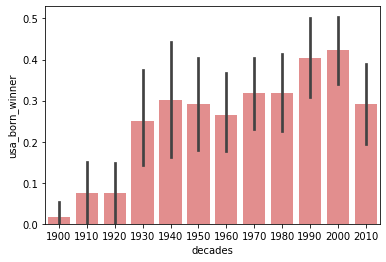

In [51]:
#using seaborn, plot the proportion of US winners by decade
sns.barplot(x = 'decades', y = 'usa_born_winner', data = nobel, color = 'lightcoral')

### Task 4
- I used seaborn, as requested. I decided to use the barplot, because it gives a clearer representation of the data.

##### What can you conclude from the graph?
- From the 1930s all the way into the 2000s, more and more USA born people were beginning to win the most.
- The country became the most dominant country in the collection of these Nobel Prizes, and that hasn't changed even in the 21st century.

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [52]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby('decades', as_index = False)['female_winner'].mean()
prop_female_winners

,decades,female_winner
0,1900,0.052632
1,1910,0.025000
2,1920,0.037037
3,1930,0.053571
4,1940,0.069767
5,1950,0.000000
6,1960,0.037975
7,1970,0.038462
8,1980,0.041237
9,1990,0.067308


### Task 5
- In order to find the female laureates, I created a new list in <code>nobel</code> called <code>female_winner</code>, which will contain a list of all the female laureates from the column <code>sex</code>.
- To display the information, I used the <code>groupby()</code> function, getting the decades and the female laureates, in their proportional values, by the <code>mean()</code> function.</p>
</p> 
Similar to Task 3.

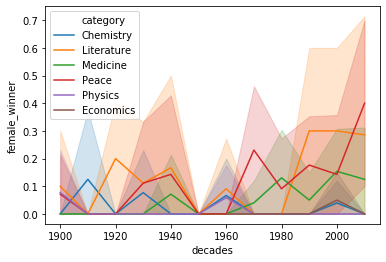

In [41]:
# # Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# # ... YOUR CODE FOR TASK 5 ...
sns.lineplot(x = 'decades', y = 'female_winner', hue = 'category', data = nobel)

#### Task 5 continues...
- I decided to use the seaborn lineplot, with the prize category(as requested), as a grouping variable, because it gives a better representation of the data.

```
# This is formatted as code
```

##### Interpret your plot here
- It seems as though many people won the Nobel Prize for Literature, and of course Peace, with Peace being the highest, in the 21st century.
- Very few won for Physics and Economics.
- An average, reasonable amount of winners won for Chemistry and Medicine.

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [43]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
nobel[(nobel['sex'] == 'Female')]['full_name'].head(1)

19    Marie Curie, née Sklodowska
Name: full_name, dtype: object

### Task 6
- In my DataFrame <code>nobel</code>, I accessed to read only the Females in the <code>sex</code>, and the names in the <code>full_name</code>.
- I used the <code>head()</code> function, using 1 as a specification to find the first female who won a Nobel prize.

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [59]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
duplic = nobel['full_name'].value_counts()
duplic[duplic >= 2].count()

6

### Task 7
- I defined a variable <code>duplic</code> and read into the <code>nobel</code> the <code>full_name</code> column only, and read into each entry by using the function <code>value_counts()</code>.
- Thus, read into my new variable <code>duplic</code>, to find the duplicated names, and counted them using the <code>count()</code> function. 
- However, to get a list of the names, I would have to remove the <code>count()</code> function when finding the duplicates.
- There's a total of 6 laureates who received 2 or more prizes.

##### How many people have received 2 or more prizes?
- There are 4 people and 2 organizations who received two or more prizes.

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [94]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
mean = nobel['age'].mean()
standdev = nobel['age'].std()
median = nobel['age'].median()
print("The mean age of winners is " + str(mean) + " and the standard deviation is " + str(standdev) + ".")
print("The median age is " + str(median) + ".")

The mean age of winners is 59.453001132502834 and the standard deviation is 12.39929042786365.
The median age is 60.0.


### Task 8
- To convert the <code>birth_date</code> into a datetime type, I used a function in Pandas <code>to_datetime()</code>.
- To calculate the ages of the winner, I used <code>dt.year</code> to extract the data from <code>nobel</code> in the columns <code>age</code> subtracting my newly converted <code>birth_date</code> to get the age.
- I then calculated the mean, standard deviation, and the median values using the functions <code>mean()</code>, <code>std()</code>, and <code>median()</code> respectively.

## 9. Age differences between prize categories


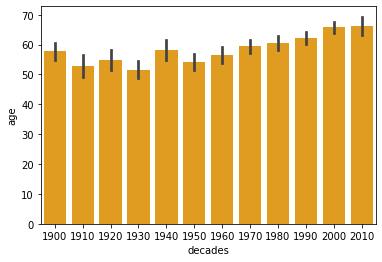

In [95]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
sns.barplot(x = 'decades', y = 'age', data = nobel, color = 'orange')

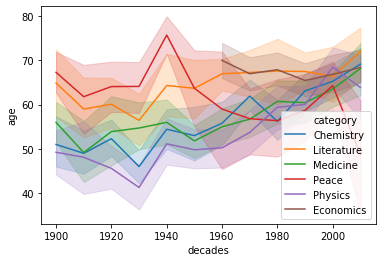

In [85]:
# Plot the age of nobel candidates by decade and prize category
sns.lineplot(x = 'decades', y = 'age', hue = 'category', data = nobel)

#### What can you conclude about the age at which people win different types of Nobel Prizes?
- Most people usually win in their mid 60s. This is observed in the 2000s, as most people of different categories won in that age group.

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [90]:
youngest = nobel['age'].min()
oldest = nobel['age'].max()
print("The youngest person to win the Nobel Prize was " + str(youngest) + " whereas the oldest was " + str(oldest) + ".")

The youngest person to win the Nobel Prize was 17.0 whereas the oldest was 90.0.


## Congratulations! You've reached the end of the challenge!